In [1]:
library(data.table)
library(ggplot2)
library(ComplexUpset)
library(repr)


In [2]:
library(extrafont)
font_import(paths = "/Library/Fonts", prompt = FALSE)
loadfonts()
fonts()


Registering fonts with R

Scanning ttf files in /Library/Fonts ...

Extracting .afm files from .ttf files...

/System/Library/Fonts/Supplemental/Arial Unicode.ttf
 : ArialUnicodeMS already registered in fonts database. Skipping.

/Library/Fonts/FontsFree-Net-MYRIADPRO-REGULAR.ttf
 : MyriadPro-Regular already registered in fonts database. Skipping.

Found FontName for 0 fonts.

Scanning afm files in /Library/Frameworks/R.framework/Versions/4.3-arm64/Resources/library/extrafontdb/metrics

Arial Unicode MS already registered with pdfFont().

Myriad Pro already registered with pdfFont().

Arial Unicode MS already registered with postscriptFont().

Myriad Pro already registered with postscriptFont().



[1] "Arial Unicode MS" "Myriad Pro"

## Upset plot for hashtag identification of hashing deconvolution methods


### Define a function to convert the result to a binary matrix


In [3]:
convert2binary <- function(assignment, identity) {
  # table in a long format
  assignment_new <- melt(assignment, id.vars = 1)
  assignment_new <- na.omit(assignment_new)

  # Subset to identity
  assignment_new <-
    assignment_new[assignment_new$value == identity, ]
  assignment_new <- assignment_new[, -3]

  # table in a wide format
  assignment_new <- dcast(assignment_new, Barcode ~ variable)
  assignment_new <-
    as.data.frame(lapply(assignment_new[, -1], as.numeric))

  # turn into a binary matrix
  assignment_new[!is.na(assignment_new)] <- 1
  assignment_new[is.na(assignment_new)] <- 0

  return(assignment_new)
}


In [4]:
# Load hashing deconvolution results
hash_gx12_assign <-
    fread("../data/pipeline_output/gx12/hash_assignment_all.csv",
        na.strings = ""
    )

# Remove the trial ID
colnames(hash_gx12_assign) <-
    c(
        "Barcode",
        "DemuxEM",
        "HashSolo",
        "HTODemux",
        "Multiseq",
        "HashedDrops",
        "GMM_Demux",
        "BFF"
    )

# Subset by only those cells detected by RNA
white_list_gx12 <-
    fread("../data/dataset/barcodes_gx12.tsv", header = FALSE)$V1
hash_gx12_assign <- hash_gx12_assign[Barcode %in% white_list_gx12, ]

# Remove TotalSeqA suffix
hash_gx12_assign$HTODemux <-
    gsub("-TotalSeqA", "", hash_gx12_assign$HTODemux)
hash_gx12_assign$Multiseq <-
    gsub("-TotalSeqA", "", hash_gx12_assign$Multiseq)
hash_gx12_assign$DemuxEM <-
    gsub("_TotalSeqA", "", hash_gx12_assign$DemuxEM)
hash_gx12_assign$HashSolo <-
    gsub("_TotalSeqA", "", hash_gx12_assign$HashSolo)
hash_gx12_assign$GMM_Demux <-
    gsub("_TotalSeqA", "", hash_gx12_assign$GMM_Demux)

# Rename HashedDrops donor
hash_gx12_assign$HashedDrops <-
    ifelse(
        hash_gx12_assign$HashedDrops != "negative",
        paste0("Hash45", hash_gx12_assign$HashedDrops),
        hash_gx12_assign$HashedDrops
    )

head(hash_gx12_assign)


Barcode,DemuxEM,HashSolo,HTODemux,Multiseq,HashedDrops,GMM_Demux,BFF
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
AAACCCAAGGTGTGAC-1,Hash454,Hash453,Hash453,Hash454,negative,negative,doublet
AAACCCAGTGAGAGGG-1,Hash453,Hash453,negative,doublet,NA,negative,doublet
AAACGAAAGAATCTAG-1,negative,Hash453,negative,negative,negative,negative,doublet
AAACGAACACATATGC-1,Hash456,Hash453,negative,negative,negative,negative,doublet
AAACGAACACGACTAT-1,Hash452,Hash453,Hash453,Hash452,negative,negative,doublet
AAACGAACATCAGCAT-1,negative,Hash453,Hash453,negative,negative,negative,doublet


In [5]:
# Change plot size to 10 x 8
options(repr.plot.width = 10, repr.plot.height = 8)

draw_upsetplot <- function(hashtag) {
  # convert to binary matrix
  hashtag_input <- convert2binary(hash_gx12_assign, hashtag)
  ComplexUpset::upset(
    hashtag_input,
    colnames(hashtag_input),
    width_ratio = 0.1,
    height_ratio = 0.5,
    stripes = "white",
    min_degree = 1,
    name = paste0(
      "Identification of hashtag ",
      gsub("Hash", "", hashtag)
    ),
    set_sizes = (
      upset_set_size() +
        theme(
          axis.text.x = element_text(
            angle = 90,
            size = 14
          ),
          axis.title.x = element_text(size = 16)
        )
    ),
    base_annotations = list(
      "Intersection size" = intersection_size(
        text = list(size = 6, family = "Myriad Pro"),
        width = 0.95,
        bar_number_threshold = 1
      )
    ),
    themes = upset_default_themes(text = element_text(
      size = 24, family =
        "Myriad Pro"
    ))
  )

  # ggsave(
  #   paste0(
  #     "s2/upset-hashing-gx12-",
  #     hashtag,
  #     ".pdf"
  #   ),
  #   width = 10,
  #   height = 8,
  #   dpi = 300
  # )
}


Using 'variable' as value column. Use 'value.var' to override



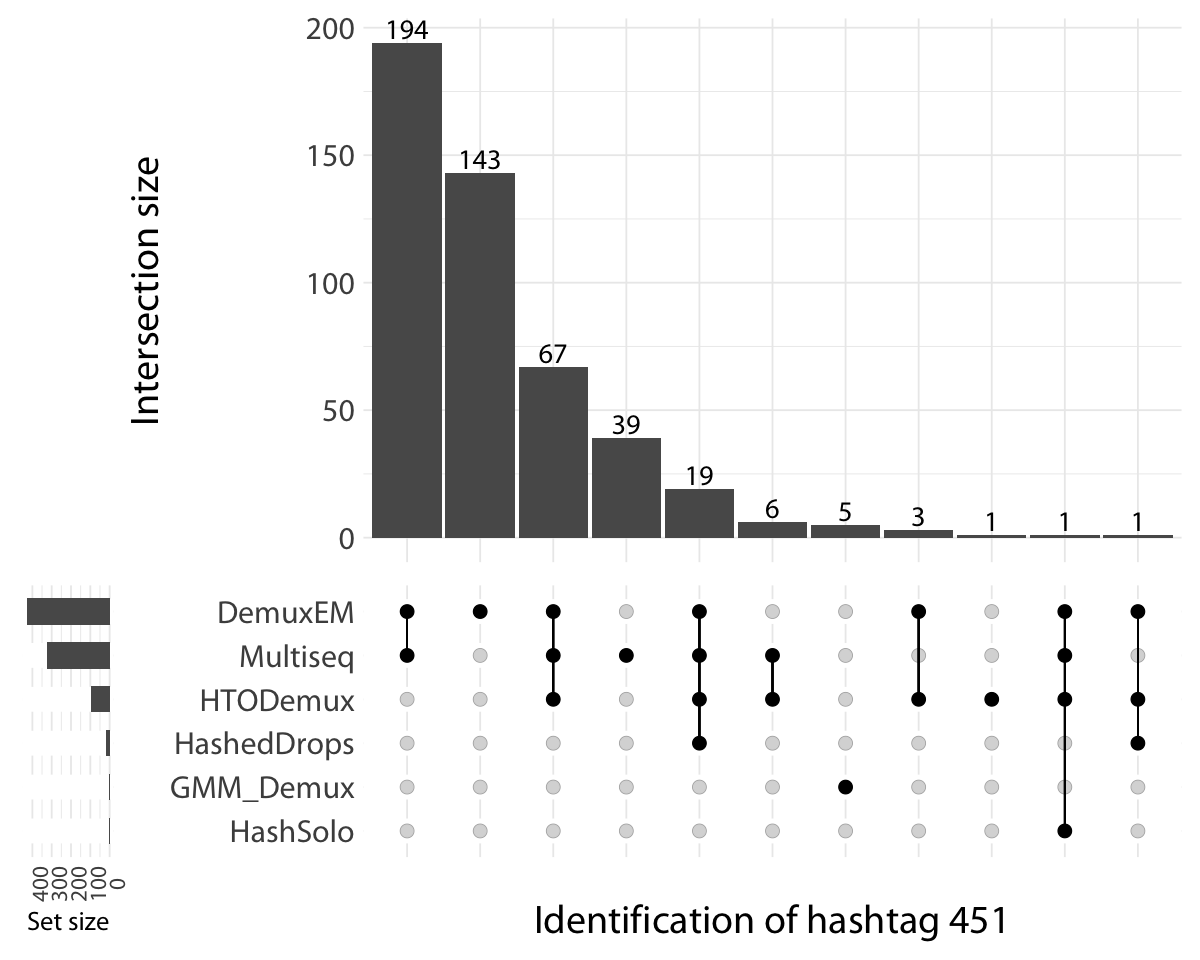

In [6]:
draw_upsetplot("Hash451")


Using 'variable' as value column. Use 'value.var' to override



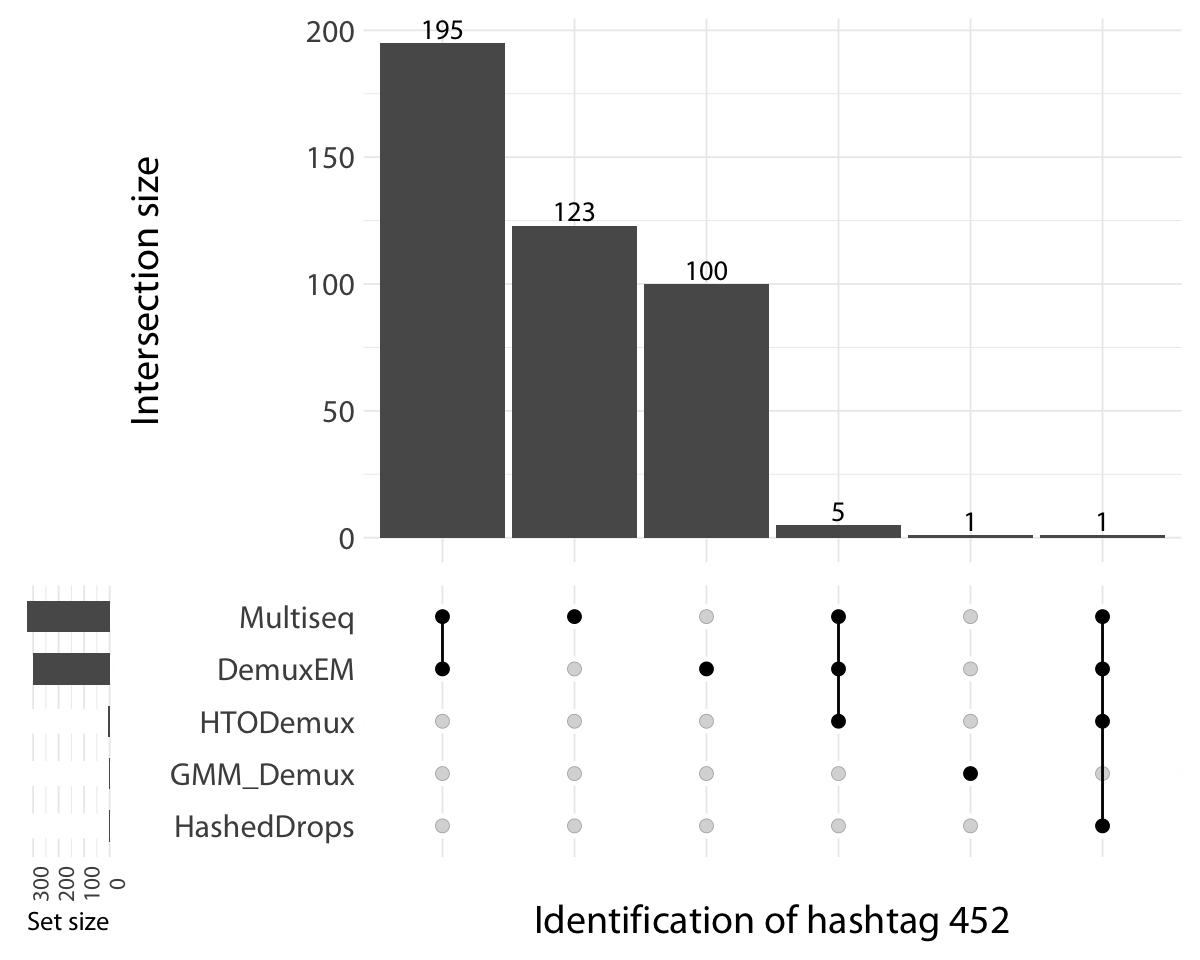

In [7]:
draw_upsetplot("Hash452")


Using 'variable' as value column. Use 'value.var' to override



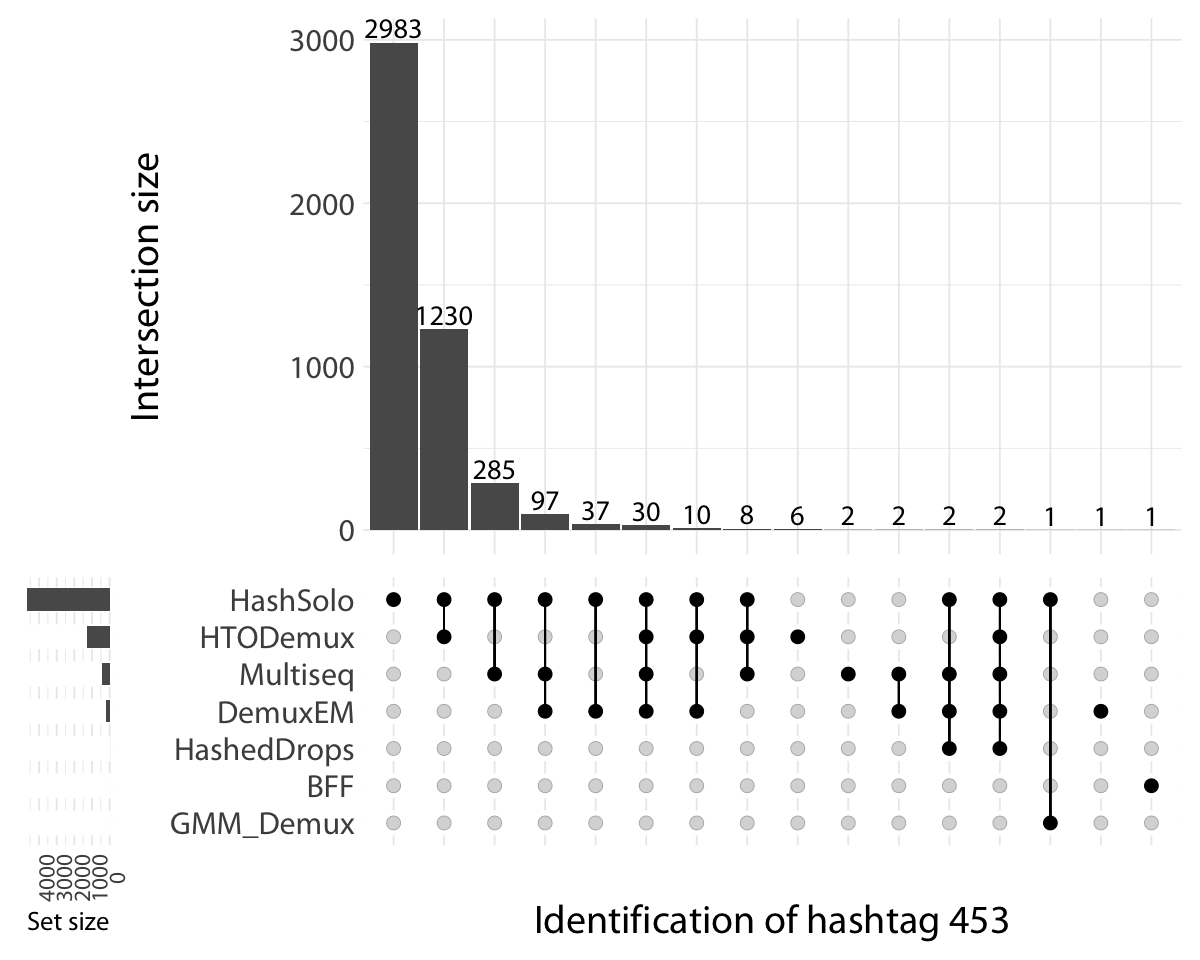

In [8]:
draw_upsetplot("Hash453")


Using 'variable' as value column. Use 'value.var' to override



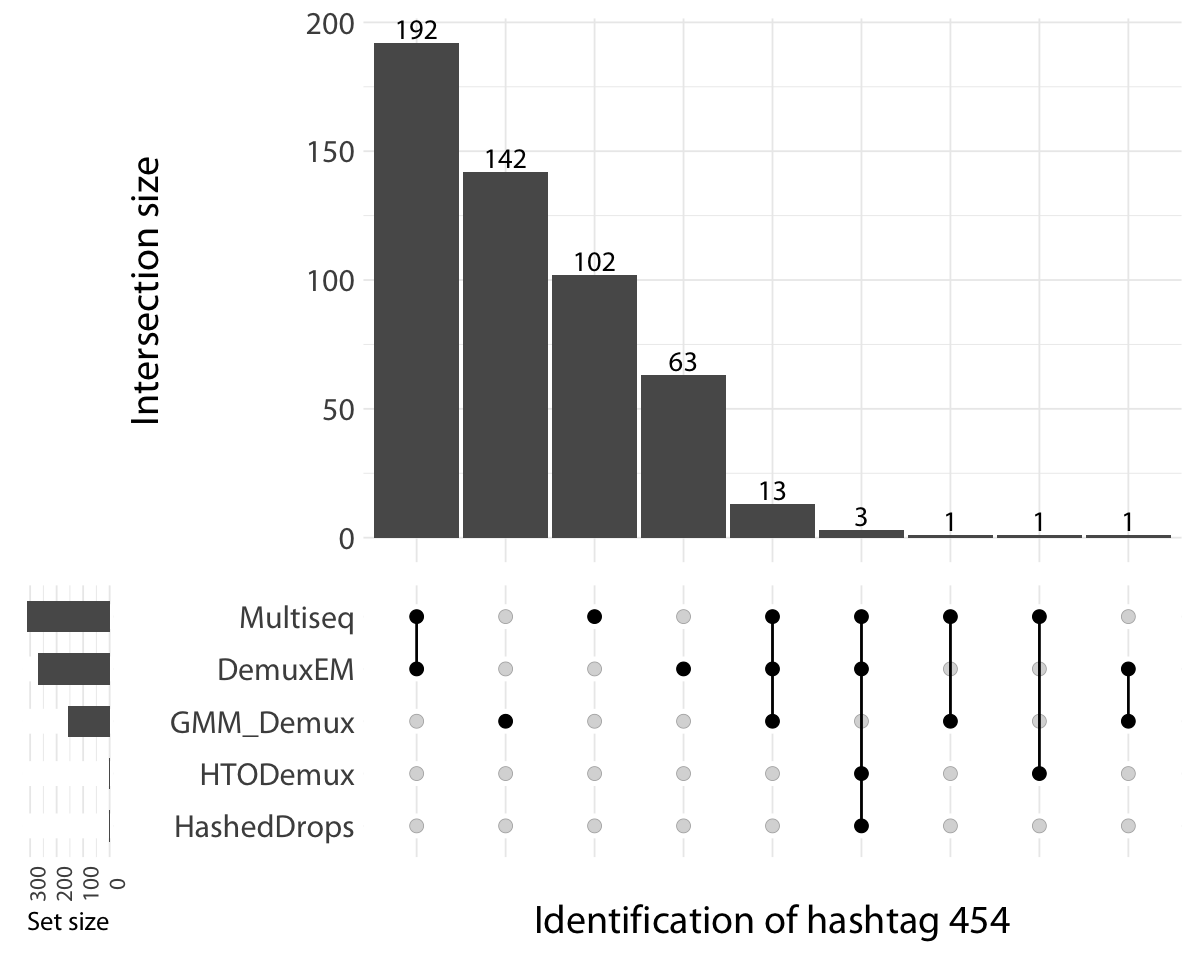

In [9]:
draw_upsetplot("Hash454")


Using 'variable' as value column. Use 'value.var' to override



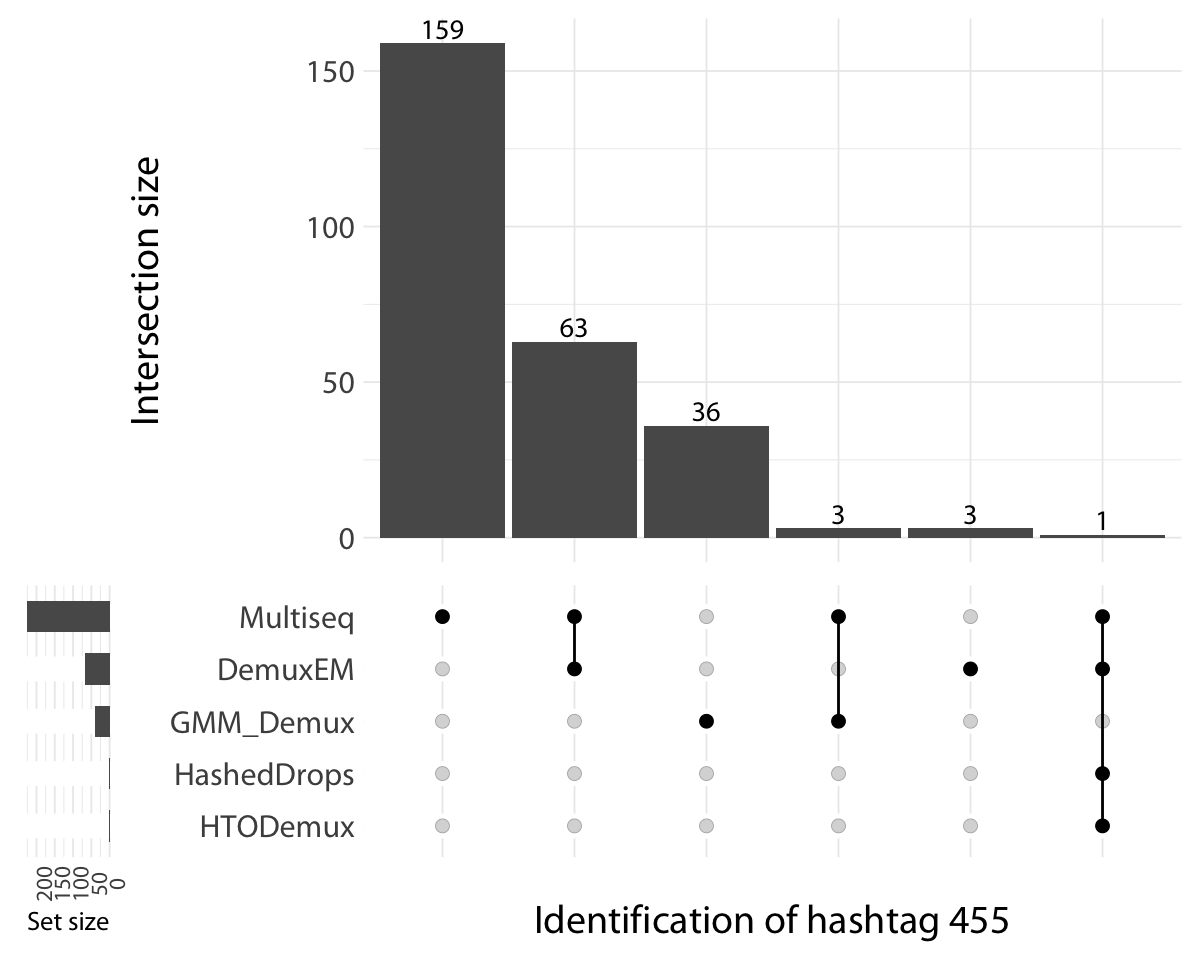

In [10]:
draw_upsetplot("Hash455")


Using 'variable' as value column. Use 'value.var' to override



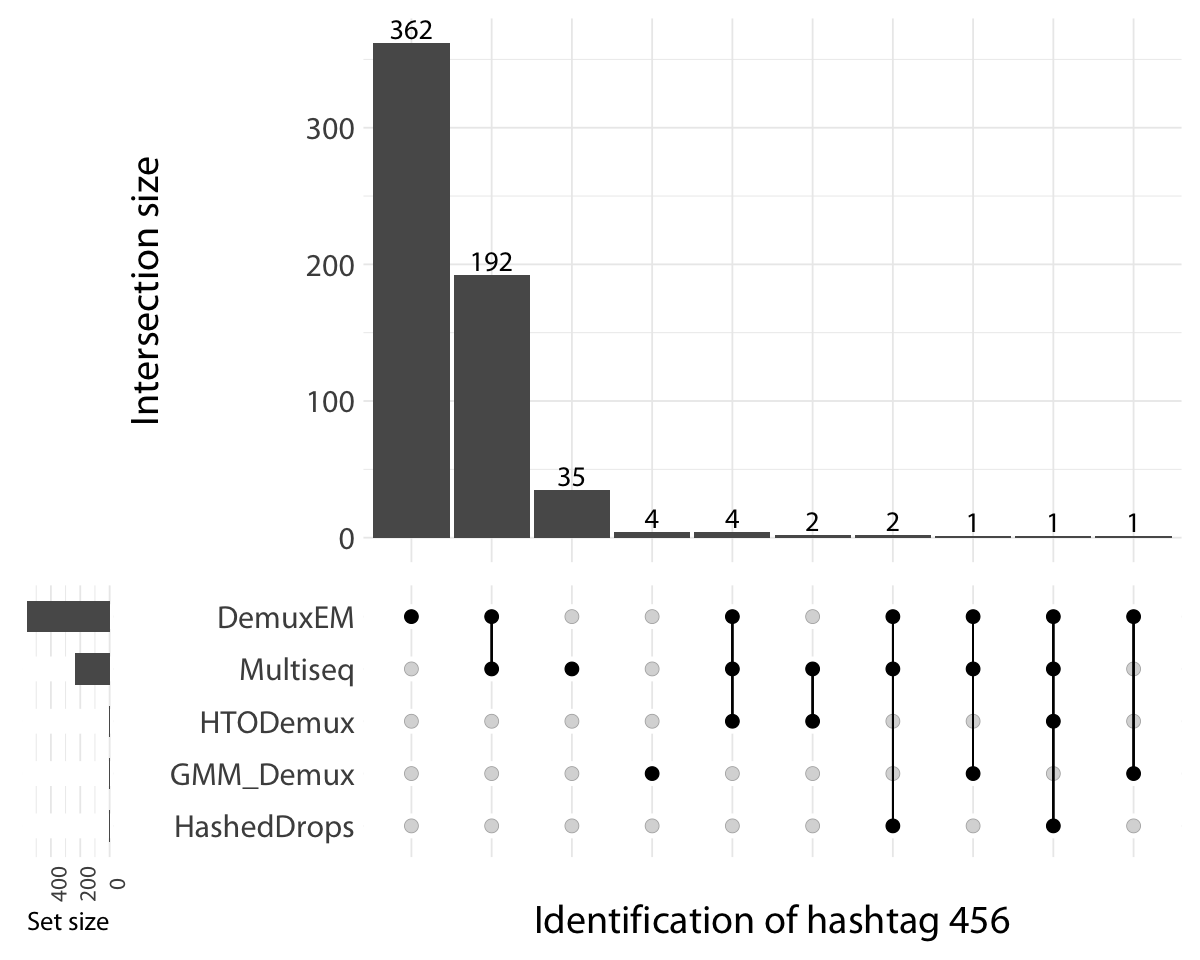

In [11]:
draw_upsetplot("Hash456")
